# 3.0 Basic Time Series Concepts

## 3.1 What is a time series?

```{admonition} Definition
A **time series** is a realization of a random variable indexed by time.
```

A time series is a set of data points collected at regular intervals over time. These data points can be any type of measurable quantity, such as stock prices, temperature readings, or monthly sales figures. Time series data is commonly used in various fields, including economics, finance, engineering, and environmental science, to study patterns and trends over time. The analysis of time series involves methods to detect, model, and forecast future values based on past observations. Time series analysis is an important tool for making informed decisions in a wide range of applications, from stock trading to weather forecasting.

A time series can be denoted as

$$
X_t = \{ x_1, x_2, \ldots, x_T \}
$$

In time series analysis and forecasting, our task is to better model and understand the above stochastic process.

```{seealso} Check this out
:class: dropdown
- CDF or cumulative density function i.e. $P(X \leq x) = F_X (x)$
  + $F_x (x)$ gives us the full description of of random variable $X$.
- For two random variables, $P(X \leq x, Y \leq y)=F_{X,Y}(x,y)$
- What if we have many variables?
  + How do we estimate their joint distribution?
  + It would be virtually impossible, so we make some assumptions to make things manageable
```

## 3.2 White noise

White noise is a term used to describe a type of time series data that is characterized by randomness, with no predictable pattern or structure. More specifically, a white noise process is a sequence of random variables that are uncorrelated and have a constant mean and variance. 

More formally, a white noise process $w_1, w_2, \dots$ (sometimes denoted $a_1, a_2, \dots$) has the following features:
- $Cov(w_t, w_s) = 0$ for $t \neq s$
- $E[w_t] = 0$
- $Var[w_t] = \sigma_w^2$, which is a constant (w.r.t. $t$)

We often require the noise to be independent and identically (iid) random variables with mean $0$ and variance $\sigma_w^2$, denoted $w_t \sim wn(0,\sigma_w^2)$.

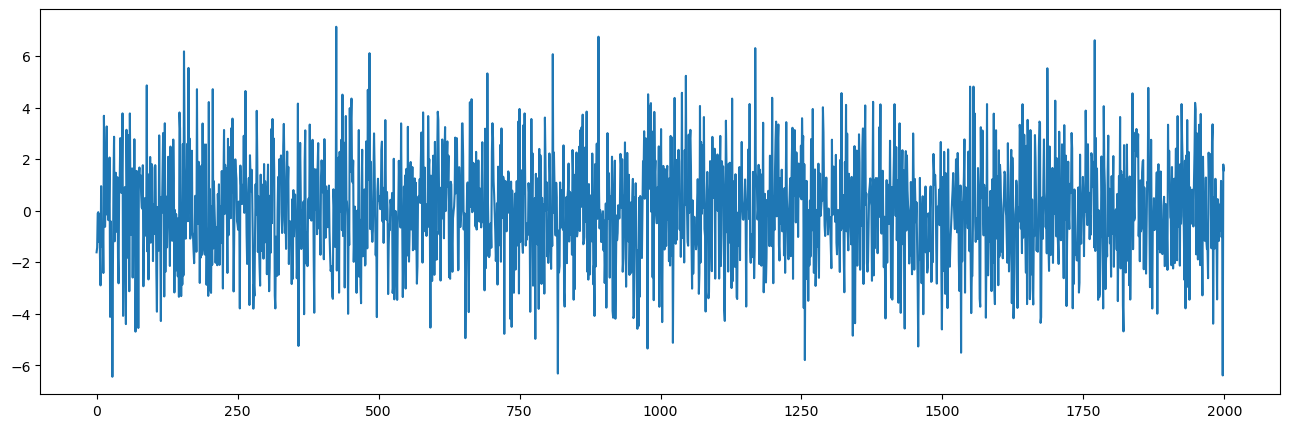

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(10101)
wn = np.random.normal(0,2,2000)

plt.figure(figsize=(16, 5))
plt.plot(wn)

The above is a particular case is the Gaussian white noise, that is, $w_t \sim N(0, \sigma_w^2)$, with mean $0$ and variance $4$. Gaussian white noise is a rather strict condition, but allows us to manage things easier statistically.

```{note}
Suppose $X$ and $Y$ are random variables, then we can denote expectation as $\mu_X = E[X]$ and $\mu_Y = E[Y]$ and variance as $\sigma_X^2 = Var[X]$ and $\sigma_Y^2 = Var[Y]$.

- Note that variance is $Var[X] = E[(X - \mu_X)^2] = E[X^2] - \mu^2_X$
- Covariance is $Cov(X,Y) = E[(X - \mu_X)(Y- \mu_Y)] = E[XY] - \mu_X \mu_Y$
- And correlation is $\rho_{X,Y} = Corr(X,Y) = \displaystyle\frac{Cov(X,Y)}{\sqrt{Var(X)}\sqrt{Var(Y)}}$

We have $-1 \leq \rho \leq 1$ (you should be able to proof this through the Cauchy-Swartz Inequality). Note also that uncorrelated does not necessarily mean independent. However, independence guarantees no correlation.
```
In time series context, we are interested in, say, $Cov(X_{t}, X_{t-1})$, which we denote $\gamma(1)$, $Cov(X_{t}, X_{t-2})$ or $\gamma(2)$, $Cov(X_t, X_{t-3})$ or $\gamma(3)$, and so on.

Hence, for stationary processes (with constant variance), the correlation of $X_t$ and its lag $X_{t-h}$ is

$\rho(h) = \displaystyle\frac{Cov(X_t, X_{t-h})}{\sqrt{Var(X_t)} \sqrt{Var(X_{t-1})}} = \frac{\gamma(h)}{\gamma(0)}$.

## 3.3 Stationary time series

What does it mean for a ssries $X_t$ to be stationary? Stochastically, it means that its joint distribution does not change over time.
    
```{admonition} Definition
A **strictly** stationary time series $x_1, \ldots , x_t, \ldots$ have a joint distribution that does not change in the following sense:
    $F_{t_1 +h, t_2 +h, \ldots , t_n +h} (x_1, \ldots , x_n) = F_{t_1, t_2, \ldots , t_n} (x_1, \ldots , x_n)$ for all $n = 1, 2, \ldots ,$ for all time points and all time shifts $h$.
```
Put differently, a strictly stationary time series is one for which the probabilistic behavior of every collection of values $ \{ x_{t_1}, x_{t_2}, \ldots , x_{t_n} \}$ is identical to that of the time shifted set $ \{ x_{t_{1+h}}, x_{t_{2+h}}, \ldots , x_{t_{n+h}} \}$, where $h$ represents the time shift or lag. 

*Example*: For $n=1, F_t(x) = P(X_t \leq x) = F_{t+h}(x)$.

*Example*: For $n=2$, the joint distribution of $X_t$ and $X_s$ is the same as that of $X_{t+h}$ and $X_{s+h}$.

```{admonition} Definition
A **weakly** stationary time series $x_1, \ldots , x_t, \ldots$ is a finite variance process such that
- the mean value function, $μ_t$, is constant and does not depend on time $t$, and
- the autocovariance function, $\gamma_X(h)$ depends on $s$ and $t$ only through their difference $h$.
```
Henceforth, we will use the term stationary to mean *weakly* stationary; if a process is stationary in the strict sense, we will use the term strictly stationary.

More succintly, $X_t$ is weakly stationary if
- $E[X_t]$ is constant
- $Cov(X_{t+h}, X_{s+h}) = Cov(X_t, X_s)$ for any $t, s$
- If $t=s$ then we have $Var(X_{t+h}) = Var(X_t)$, which is some constant $\sigma_X^2$.

Further note that a weakly stationary series $X_t$ has $\gamma_X(h) = Cov(x_t, x_{t+h})$ that is only dependent on $h$ and not $t$ ($\gamma_X(h)$ is known as the autocovariance function of $X$ defined at lag $h$).

*Example*: Is the white noise $wn_t$ stationary?

To get the mean and standard deviation of a series in Python, use the  `np.mean()` and  `np.std()` commands from the **Numpy** library.

In [2]:
print('Mean of white noise:', round(np.mean(wn), 3))
print('Standard deviation of white noise:', round(np.std(wn), 3))

Mean of white noise: 0.015
Standard deviation of white noise: 2.004


So the mean is basically $0$ while the variance is constant. Does this make it white noise?

## 3.4 Autocorrelation Function (ACF)

```{admonition} Definition
The autocorrelation function (ACF) of a stationary time series $\rho_X(h)$ may be written as

$ \rho_X(h) = \displaystyle\frac{\gamma (t+h, t)}{\sqrt{\gamma(t+h, t+h) \gamma(t,t)}}$
```
Which if $X_t$ is *weakly* stationary can be written simply as $\rho_X(h) = \displaystyle\frac{\gamma(h)}{\gamma(0)}$

And by the Cauchy-Schwartz inequality, $-1 \leq \rho_X(h) \leq 1$.

Similarly, the autocovariance function $\gamma_X$ satisfies:
- $|\gamma(h)| \leq \gamma (0)$
- $\gamma(h) = \gamma (-h)$

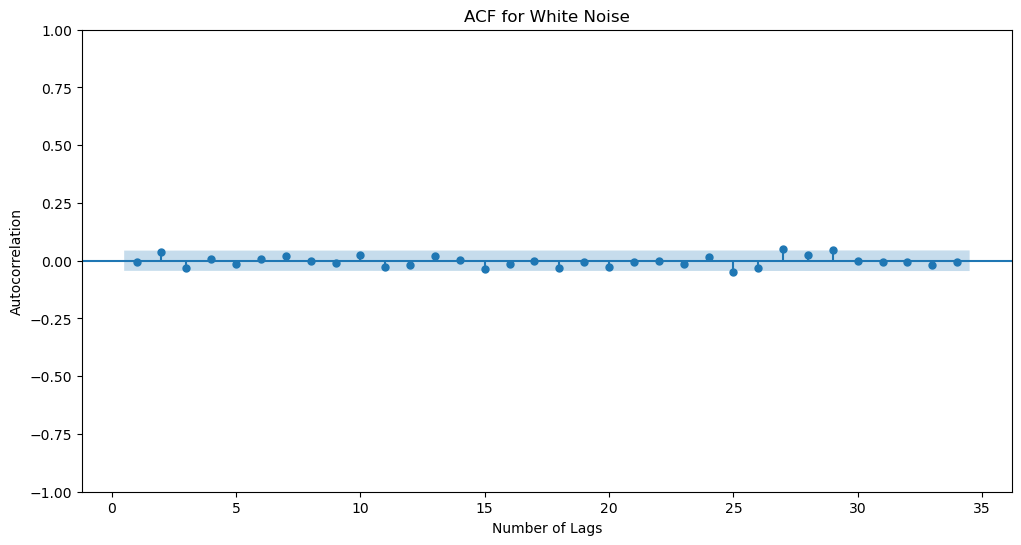

In [3]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation function of white noise
plt.rc("figure", figsize=(12, 6))
plot_acf(wn, zero=False);
plt.xlabel('Number of Lags')
plt.ylabel('Autocorrelation')
plt.title('ACF for White Noise')
plt.show()

## 3.5 Partial Autocorrelation Function (PACF)

## 3.6 Unit Root Test

### 3.6.1 The Augmented Dickey-Fuller Test

The Augmented Dickey–Fuller (ADF) test is implemented using the t-statistic on $\phi$ in the following regression:

$\Delta X_t = \mu_t + \phi X_{t-1} + \sum_{i=1}^{p} \Delta X_{t-i} + \epsilon_t$

This test statistic is probably the best-known and most widely used unit root test. It is a one-sided test whose null hypothesis is $\phi = 0$ versus the alternative $\phi < 0$ (and hence large negative values of the test statistic lead to the rejection of the null). Under the null, $X_t$ must be differenced at least once to achieve stationarity; under the alternative, $X_t$ is already stationary and no differencing is required.

One peculiar aspect of this test is that its limit distribution is non-standard under the null hypothesis: moreover, the shape of the distribution, and consequently the critical values for the test, depends on the form of the $\mu_t$ term. A full analysis of the various cases can be found in Hamilton (1994) which contains an excellent discussion, but any recent time series textbook covers this topic.

In [4]:
from statsmodels.tsa.stattools import adfuller

# Check whether white noise is stationary or not
result = adfuller(wn)
result

t_statistic, p_value, critical_value = round(result[0], 5), round(result[1], 5), round(result[4]['1%'], 5)

print('Test statistic:', t_statistic)
print('p-value:', p_value)
print('Critical Value:', critical_value)

Test statistic: -25.96555
p-value: 0.0
Critical Value: -3.43363


### 3.6.2 The ADF-GLS test

Elliott, Rothenberg and Stock (1996) proposed a variant of the ADF test which involves an alternative method of handling the parameters pertaining to the deterministic term $\mu_t$: these are estimated first via Generalized Least Squares, and in a second stage an ADF regression is performed using the GLS residuals. This variant offers greater power than the regular ADF test for the cases $\mu_t = \mu_0$ and $\mu_t = \mu_0 + \mu_{1t}$.

### 3.6.3 The KPSS test

The KPSS test (Kwiatkowski, Phillips, Schmidt and Shin, 1992) is a unit root test in which the null hypothesis is opposite to that in the ADF test: under the null, the series in question is stationary; the alternative is that the series is I(1). The basic intuition behind this test statistic is very simple: if $X_t$ can be written as $X_t = \mu + \epsilon_t$, where $\epsilon_t$ is some zero-mean stationary process, then not only does the sample average of the $X_t$s provide a consistent estimator of $\mu$, but the long-run variance of ut is a well-defined, finite number. Neither of these properties hold under the alternative.